<a href="https://colab.research.google.com/github/ark150/PracticaSIDI2Semana1/blob/master/sistdist2_semana_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

documento de practica de sistemas distribuidos semana 2


# Resumen semana 1

* como se gurada la informacion en la computadora, uso de memoria

In [0]:
import numpy as np
import pandas as pd
import psutil, os
def huella_de_memoria():
  '''regresa la memoria usada por un proceso en python'''
  mem= psutil.Process(os.getpid()).memory_info().rss
  return (mem / 1024**2)

In [3]:
antes = huella_de_memoria()
N=(1024**2)//8
x = np.random.rand(50*N)
despues = huella_de_memoria()
print(despues-antes)
print(format(x.nbytes/ (1024**2)))

50.2578125
50.0


In [5]:
antes=huella_de_memoria()
x**2
despues = huella_de_memoria()
print(despues-antes)
print(format(x.nbytes/ (1024**2)))

0.0
50.0


In [6]:
df = pd.DataFrame(x)
print(format(df.memory_usage(index=False) / (1024**2)))

0    50.0
dtype: float64


#semana 2
comenzamos descargando los datos que usaremos

https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

Links de los datos: 

Enero:

https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv

Julio:

https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-07.csv

In [7]:
!wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv

--2019-05-14 15:53:11--  https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.86.85
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.86.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 772098307 (736M) [text/csv]
Saving to: ‘yellow_tripdata_2018-01.csv’

yellow_tripdata_201 100%[===================>] 736.33M  95.3MB/s    in 7.7s    

2019-05-14 15:53:19 (95.6 MB/s) - ‘yellow_tripdata_2018-01.csv’ saved [772098307/772098307]



In [9]:
ls -l

total 754012
drwxr-xr-x 1 root root      4096 May  8 16:22 sample_data/
-rw-r--r-- 1 root root 772098307 Aug  3  2018 yellow_tripdata_2018-01.csv


In [10]:
!wc -l yellow_tripdata_2018-01.csv

8759876 yellow_tripdata_2018-01.csv


Vamos a escribir un programa para automatizar la descargar todo 2018 

In [0]:
plantilla = 'yellow_tripdata_2018-{:02d}.csv'
plantillaURL = 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/'+plantilla

In [13]:
for y in range(1,13):
  print(plantillaURL.format(y))

wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-02.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-03.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-04.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-05.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-06.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-07.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-08.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-09.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-10.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-11.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-12.csv


Generar una lista

In [0]:
comandos= [plantillaURL.format(y) for y in range(1,13)]

Generar un generador

In [17]:
(plantillaURL.format(y) for y in range(1,13))

<generator object <genexpr> at 0x7fd4fde03e60>

DEscargar los datos usando la instruccion en la lista comando

In [0]:
comandos= [plantillaURL.format(y) for y in range(2,4)]
for cmd in comandos:
  os.system(cmd)

Accediendo a los datos con pandas

In [20]:
ls

sample_data/                 yellow_tripdata_2018-02.csv.1
yellow_tripdata_2018-01.csv  yellow_tripdata_2018-03.csv
yellow_tripdata_2018-02.csv  yellow_tripdata_2018-03.csv.1


In [0]:
archivo = 'yellow_tripdata_2018-01.csv'

Calcular la huella antes y despues de cargar el archivo

In [0]:
df= pd.read_csv(archivo)

In [25]:
df.memory_usage(index=False)/(1024**2)

VendorID                 66.832535
tpep_pickup_datetime     66.832535
tpep_dropoff_datetime    66.832535
passenger_count          66.832535
trip_distance            66.832535
RatecodeID               66.832535
store_and_fwd_flag       66.832535
PULocationID             66.832535
DOLocationID             66.832535
payment_type             66.832535
fare_amount              66.832535
extra                    66.832535
mta_tax                  66.832535
tip_amount               66.832535
tolls_amount             66.832535
improvement_surcharge    66.832535
total_amount             66.832535
dtype: float64

In [26]:
sum(df.memory_usage(index=False)/(1024**2))

1136.153091430664

In [0]:
dfcs= pd.read_csv(archivo, chunksize=50000)

In [0]:
for trozo in pd.read_csv(archivo, chunksize=50000):
  print('type: %s shape %s' % (type(trozo), trozo.shape))

In [33]:
trozo.shape

(9874, 17)

In [35]:
trozo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9874 entries, 8750000 to 8759873
Data columns (total 17 columns):
VendorID                 9874 non-null int64
tpep_pickup_datetime     9874 non-null object
tpep_dropoff_datetime    9874 non-null object
passenger_count          9874 non-null int64
trip_distance            9874 non-null float64
RatecodeID               9874 non-null int64
store_and_fwd_flag       9874 non-null object
PULocationID             9874 non-null int64
DOLocationID             9874 non-null int64
payment_type             9874 non-null int64
fare_amount              9874 non-null float64
extra                    9874 non-null float64
mta_tax                  9874 non-null float64
tip_amount               9874 non-null float64
tolls_amount             9874 non-null float64
improvement_surcharge    9874 non-null float64
total_amount             9874 non-null float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.3+ MB


In [36]:
trozo.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8750000,2,2018-01-31 23:36:22,2018-01-31 23:46:11,1,1.8,1,N,162,186,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76
8750001,1,2018-01-31 23:41:34,2018-01-31 23:45:40,2,1.0,1,N,234,79,1,5.5,0.5,0.5,2.00,0.0,0.3,8.80
8750002,1,2018-01-31 23:26:35,2018-01-31 23:29:48,2,0.6,1,N,234,170,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
8750003,1,2018-01-31 23:15:56,2018-01-31 23:16:09,1,9.6,1,N,77,77,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80
8750004,1,2018-01-31 23:17:26,2018-01-31 23:17:42,1,9.6,1,N,77,77,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80


tarea hacer el filtrado de los 8 millones

DEfinir una condicion de 'es_un_viaje_largo' si el valor de la columna trip_distance es mayor a 10(millas aprox)

In [37]:
es_un_viaje_largo=(trozo.trip_distance > 10)
es_un_viaje_largo.head()

8750000    False
8750001    False
8750002    False
8750003    False
8750004    False
Name: trip_distance, dtype: bool

In [41]:
trozo.loc[es_un_viaje_largo].shape

(431, 17)

Encapsulemos esta funcion de filtrado en una funcion

In [0]:
def filtra_es_un_viaje_largo(data):
  es_un_viaje_largo =(data.trip_distance >10)
  return data.loc[es_un_viaje_largo]

In [0]:
trozos=[]
for trozo in pd.read_csv(archivo, chunksize=500000):
  trozos.append(filtra_es_un_viaje_largo(trozo))

In [45]:
len(trozos)

18

es conveniente usar una *comprension de lista* para generar la lista anterior

In [58]:
trozos=[filtra_es_un_viaje_largo(trozo) for trozo in pd.read_csv(archivo, chunksize=500000)]
len(trozos)

18

In [59]:
tamaños = [ len(trozo) for trozo in trozos]
tamaños

[36840,
 24360,
 27249,
 32064,
 26497,
 27405,
 23502,
 30812,
 25838,
 24353,
 22569,
 30044,
 24992,
 24950,
 22277,
 27423,
 23822,
 11817]

In [60]:
np.mean(tamaños)

25934.11111111111

In [64]:
sum(tamaños)

466814

vamos a concatenar todos estos trozos en una nueva estructura  de datos DataFrame
dicha estructura debera tener cuantos registros?

In [62]:
viajes_largos_df= pd.concat(trozos)
viajes_largos_df.shape

(466814, 17)

In [0]:
import matplotlib.pyplot as plt

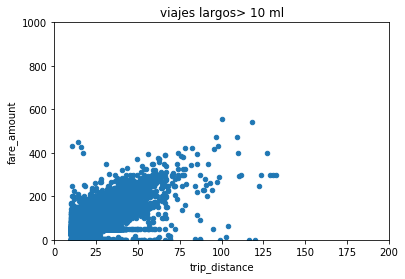

In [71]:
viajes_largos_df.plot.scatter(x='trip_distance', y='fare_amount', title='viajes largos> 10 ml',xlim=(0,200), ylim=(0,1000));

tarea hacer un workflow para detectar outlayer

tarea hacer el calculo con comprension de listas


#generadores


In [78]:
trozos=(filtra_es_un_viaje_largo(trozo) for trozo in pd.read_csv(archivo, chunksize=500000))

<generator object <genexpr> at 0x7fd4e3ef4888>

tarea cual es la huella de memoria del generador anterior

antes y despues de generarlo

In [0]:
[trozo['trip_distance'].sum() for trozo in trozos]

In [0]:
distancias =(trozo['trip_distance'].sum() for trozo in trozos)

In [80]:
sum(distancias)

7339629.629999999

Vamos a leer muchos archivos

In [0]:
df = pd.read_csv('yellow_tripdata_2018-01.csv', parse_dates=[1,2])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: datetime64[ns](2), float64(8), int64(6), object(1)
memory usage: 1.1+ GB


In [85]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [0]:
def cuenta_viajes_tardados(df):
  df['duracion'] =(df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.seconds
  es_viaje_tardado = df.duracion > 1200
  result_dict = {'n_long': [sum(es_viaje_tardado)],
                'n_total': [len(df)]}
  return pd.DataFrame(result_dict)

In [0]:
archivos = [plantilla.format(y) for y in range(1,4)]

In [0]:
dataframes = (pd.read_csv(archivo, parse_dates=[1,2]) for archivo in archivos)

In [0]:
totales = (cuenta_viajes_tardados(df) for df in dataframes)

In [0]:
totales_trimestrales = sum(totales)

In [131]:
print(totales_trimestrales)

    n_long   n_total
0  4942465  26682326


In [133]:
totales_trimestrales['n_long']/totales_trimestrales['n_total']

0    0.185234
dtype: float64

In [0]:
import time